In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import special
import math

# Beta

In [2]:
X = np.random.beta(5, 3, 100)

/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_16043/2887646674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=X, hist=False)


<Axes: ylabel='Density'>

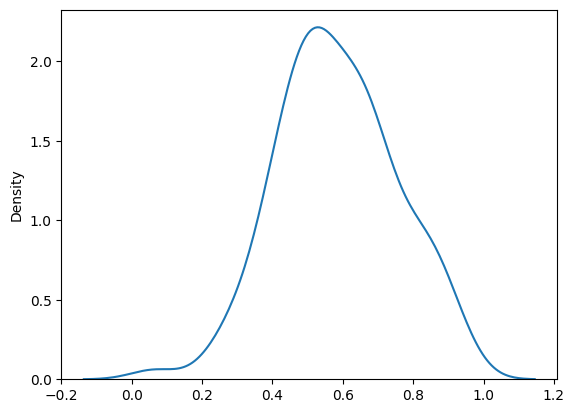

In [3]:
sns.distplot(a=X, hist=False) 

### L = $\Pi \frac{1}{Beta(\alpha, \beta)} x_i^{\alpha - 1} (1 - x_i)^{\beta - 1} $ <br>
### Log L = $\Sigma [log(\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}) + (\alpha - 1)log(x_i) + (\beta - 1)log(1 - x_i)]$ <br>
### $\frac{\partial}{\partial \alpha} [log L] = n (Digamma(\alpha + \beta) - Digamma(\alpha)) + \Sigma log(x_i)$
### $\frac{\partial}{\partial \beta} [log L] = n (Digamma(\alpha + \beta) - Digamma(\beta)) + \Sigma log(1 - x_i)$

In [4]:
def logL(x, al, be):
    n = len(x)
    return n*math.log(math.gamma(al + be)/(math.gamma(al)*math.gamma(be))) + (al - 1) * sum(np.log(x)) + (be - 1) * sum(np.log(1 - x))
    
def der_a(x, al, be):
    n = len(x)
    return n*(special.digamma(al + be) - special.digamma(al)) + sum(np.log(x))

def der_b(x, al, be):
    n = len(x)
    return n*(special.digamma(al + be) - special.digamma(be)) + sum(np.log(1 - x))

## Case 1 : We know $\beta = 3$, and we need to predict $\alpha$

In [5]:
def GD_a(x, st = 2, epochs = 1e3, lr = 1e-3, er = 1e-5):
    al = st
    A = [al]
    iters = 1
    while (der_a(x, al, 3)**2 > er**2):
        al = al + lr*der_a(x, al, 3)
        A.append(al)
        iters += 1
        if (iters > epochs):
            print("Stop.")
            return A
    return A

In [6]:
Al = GD_a(X, lr = 1e-1, st = 10)
Al

[10,
 6.843764426389699,
 4.81192700337534,
 4.180049807551914,
 4.22229928749258,
 4.214005606892367,
 4.215564061127826,
 4.215268638823701,
 4.215324547720033,
 4.215313963629391,
 4.215315967181476]

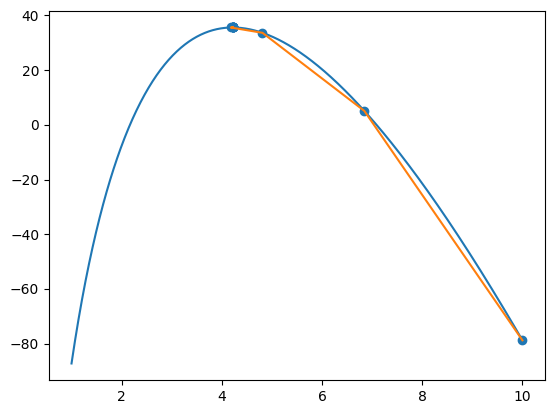

In [7]:
x = np.arange(1, 10, step = 1e-2)
y = [logL(X, al, 3) for al in x]
Y = [logL(X, al, 3) for al in Al]
plt.plot(x, y)
plt.plot(Al, Y)
plt.scatter(Al, Y)

## Case 2 : We know $\alpha = 5$, and we need to predict $\beta$

In [8]:
def GD_b(x, st = 4, epochs = 1e3, lr = 1e-3, er = 1e-5):
    be = st
    A = [be]
    iters = 1
    while (der_b(x, 5, be)**2 > er**2):
        be = be + lr*der_b(x, 5, be)
        A.append(be)
        iters += 1
        if (iters > epochs):
            print("Stop.")
            return A
    return A

In [9]:
Be = GD_b(X, st = 8, lr = 6e-2)
Be

[8,
 5.147516678980926,
 3.6063154284740975,
 3.4252800544074127,
 3.4659989598260745,
 3.4552507041418368,
 3.4579949390867495,
 3.4572879992135364,
 3.457469700422051,
 3.457422971324351,
 3.45743498709546,
 3.4574318972788722,
 3.457432691807287]

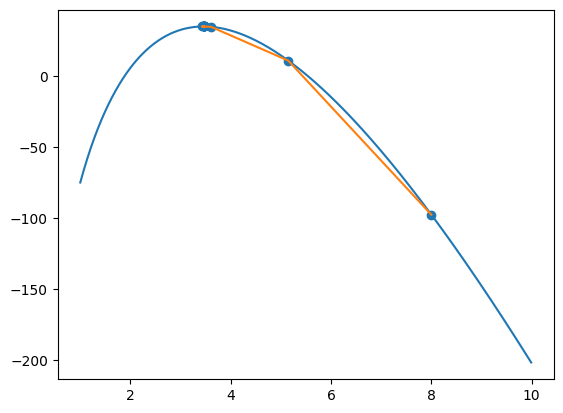

In [10]:
x = np.arange(1, 10, step = 1e-2)
y = [logL(X, 5, be) for be in x]
Y = [logL(X, 5, be) for be in Be]
plt.plot(x, y)
plt.plot(Be, Y)
plt.scatter(Be, Y)

## Case 3 : We need to predict $\alpha$ and $\beta$

In [11]:
def GD_a_b(x, st = [1, 1], epochs = 1e3, lr = 1e-3, er = 1e-5):
    co = st
    A = [co]
    iters = 1
    while (der_a(x, co[0], co[1])**2 + der_b(x, co[0], co[1])**2 > er**2):
        B = [0, 0]
        B[0] = co[0] + lr*der_a(x, co[0], co[1])
        B[1] = co[1] + lr*der_b(x, co[0], co[1])
        A.append(B)
        co = B
        iters += 1
        if (iters > epochs):
            print("Stop.")
            return A
    return A

In [12]:
GD_a_b(X, lr = 5e-2)

[[1, 1],
 [3.050670091982728, 1.07116288904976],
 [1.8389174054635453, 4.922303009149016],
 [6.500339917171814, 1.726769441476022],
 [4.813324010902946, 5.877242428735696],
 [6.153669508501552, 4.139679598288461],
 [5.94701864104515, 4.146523478458369],
 [5.823075861437438, 4.041056433303723],
 [5.692986096094498, 3.960506466834137],
 [5.572594335574846, 3.8806001515535744],
 [5.458605250900162, 3.806180055763725],
 [5.351654749191476, 3.7360239579563257],
 [5.2513999510785005, 3.670343044786531],
 [5.157729521002832, 3.6089373823131687],
 [5.070429497105939, 3.5517097598720846],
 [4.98928939276337, 3.4985087646992894],
 [4.91406968673447, 3.4491842713812275],
 [4.84451785178292, 3.403569620315416],
 [4.780366483556117, 3.3614916095183256],
 [4.721338886945866, 3.322769385899961],
 [4.667151511192162, 3.2872181755588374],
 [4.617517742986285, 3.2546507528624016],
 [4.5721508223174805, 3.224879857377579],
 [4.530766854780593, 3.1977199103290026],
 [4.493087326944679, 3.172988810983628],

# Cauchy

### f = $\frac{1}{\pi} \frac{1}{1 + (x - \theta)^2}$ <br>
### log L = $\Sigma [-log(\pi) - log(1 + (x_i - \theta)^2)]$ <br>
### (log L)' = $\Sigma \frac{2(x_i - \theta)}{1 + (x_i - \theta)^2}$ <br>
### (log L)" = $\Sigma \frac{-2 + 2(x_i - \theta)^2}{(1 + (x_i - \theta)^2)^2}$

In [13]:
X = np.random.standard_cauchy(1000) + 5

/var/folders/v9/5bvvpz4n1d5b0x86cn_kvkz80000gp/T/ipykernel_16043/2887646674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=X, hist=False)


<Axes: ylabel='Density'>

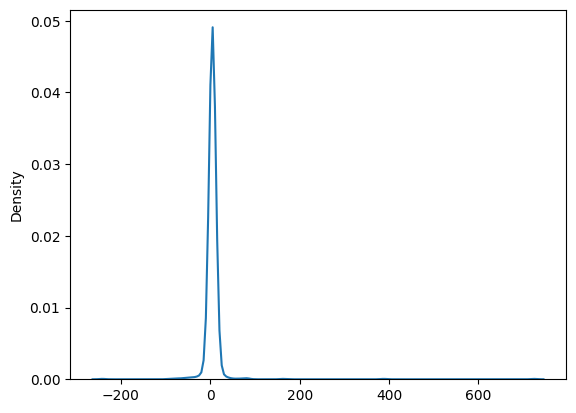

In [14]:
sns.distplot(a=X, hist=False) 

In [15]:
np.median(X)

4.965213535094987

In [16]:
def logLike(x, t):
    n = len(x)
    return -n*math.log(math.pi) - sum(np.log(1 + (x - t)**2))

def logPrime(x, t):
    return 2*sum((x - t)/(1 + (x - t)**2))

def logDoublePrime(x, t):
    return 2*sum(((x - t)**2 - 1)/(1 + (x - t)**2)**2)

In [17]:
def NR(x, ep = 1e3, er = 1e-5, st = 4):
    t = st
    A = [t]
    iters = 1
    while (logPrime(x, t)**2 > er**2):
        t = t - logPrime(x, t)/logDoublePrime(x, t)
        iters += 1
        A.append(t)
        if (iters > ep):
            print("Stop.")
            return A
    return A

In [18]:
Thetas = NR(X, st = 3)
Thetas

[3,
 -22.39820210206091,
 -58.96190278186096,
 -7849.8665471844215,
 -15705.003071470102,
 -31415.369693198736,
 -62836.1527986906,
 -125677.74479054582,
 -251360.94188829308,
 -502727.34269816714,
 -1005460.1476396339,
 -2010925.759187081,
 -4021856.9831151473,
 -8043719.431388099,
 -16087444.328142468,
 -32174894.121755477,
 -64349793.70903361,
 -128699592.88361597,
 -257399191.23279357]

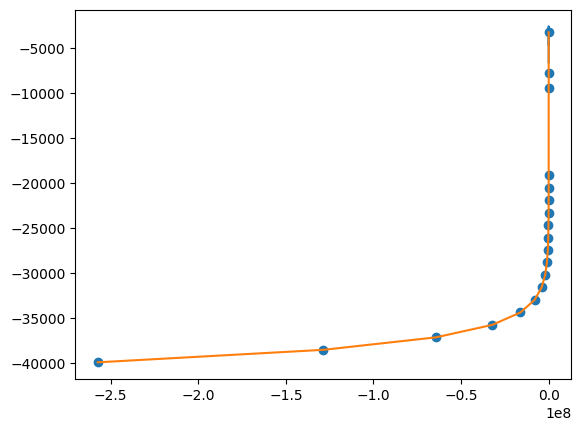

In [19]:
x = np.arange(-10, 10, step = 1e-2)
y = [logLike(X, t) for t in x]
Y = [logLike(X, t) for t in Thetas]
plt.plot(x, y)
plt.plot(Thetas, Y)
plt.scatter(Thetas, Y)

In [20]:
def GD(x, ep = 1e3, er = 1e-5, st = 4, lr = 1e-3):
    t = st
    A = [t]
    iters = 1
    while (logPrime(x, t)**2 > er**2):
        t = t + lr*logPrime(x, t)
        iters += 1
        A.append(t)
        if (iters > ep):
            print("Stop.")
            return A
    return A

In [21]:
Thetas = GD(X, st = 50)
Thetas

[50,
 49.95697222632676,
 49.91388874119808,
 49.87074921319871,
 49.82755335832742,
 49.784300933963955,
 49.74099173348407,
 49.69762558146217,
 49.65420232940429,
 49.61072185195872,
 49.567184043555216,
 49.52358881542816,
 49.47993609298295,
 49.4362258134686,
 49.3924579239232,
 49.34863237936222,
 49.30474914118263,
 49.26080817575869,
 49.21680945320775,
 49.17275294630681,
 49.128638629542586,
 49.0844664782798,
 49.040236468034,
 48.995948573836856,
 48.951602769683085,
 48.90719902804954,
 48.8627373194779,
 48.81821761221345,
 48.7736398718933,
 48.729004061278104,
 48.684310140022035,
 48.63955806447636,
 48.59474778752252,
 48.549879258431005,
 48.504952422742846,
 48.45996722217085,
 48.414923594517994,
 48.36982147361074,
 48.32466078924536,
 48.27944146714533,
 48.234163428928454,
 48.18882659208207,
 48.14343086994539,
 48.0979761716976,
 48.05246240235104,
 48.00688946274833,
 47.961257249562934,
 47.91556565530229,
 47.86981456831304,
 47.824003872787785,
 47.778133

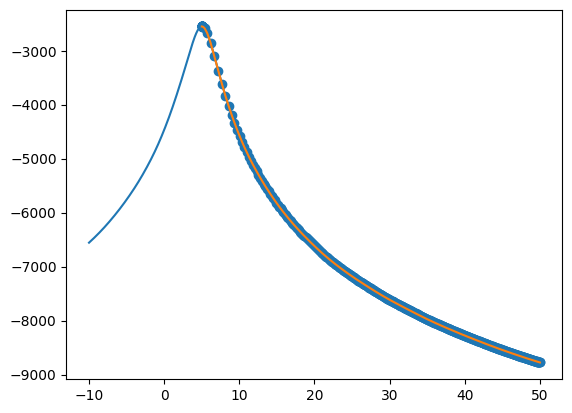

In [22]:
x = np.arange(-10, 10, step = 1e-2)
y = [logLike(X, t) for t in x]
Y = [logLike(X, t) for t in Thetas]
plt.plot(x, y)
plt.plot(Thetas, Y)
plt.scatter(Thetas, Y)